In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# from src.models import *
from ilan_src.models import *
from src.dataloader import *
from src.utils import *
from src.evaluation import *

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [4]:
DATADRIVE = '/home/jupyter/data/'

In [6]:
data_dir = '/home/jupyter/data/'

args = {'tigge_dir':data_dir+'tigge/32km/',
    'tigge_vars':['total_precipitation'],#, 'total_column_water_ens10', '2m_temperature', 'convective_available_potential_energy', 'convective_inhibition'],
    'mrms_dir':data_dir + f'mrms/4km/RadarOnly_QPE_06H/',
    'rq_fn':data_dir + f'mrms/4km/RadarQuality.nc',
#     'const_fn':data_dir + 'tigge/32km/constants.nc',
#     'const_vars':['orog', 'lsm'],
    'data_period':('2018-01', '2018-12'),
#     'val_days':5,
    'split':'train',
#     'pure_sr_ratio':8, 
    'tp_log':0.01, 
    'scale':True,
#     'ensemble_mode':'random',
    'pad_tigge':15,
    'pad_tigge_channel': True,
    'idx_stride':1,
    'first_days': 2
    }

ds_train = TiggeMRMSDataset(**args)

weights = ds_train.compute_weights()

print(np.unique(weights))

/opt/conda/envs/ilan/lib/python3.9/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


Loading data
[0.02]


In [7]:
weights

array([0.02, 0.02, 0.02, ..., 0.02, 0.02, 0.02])

In [18]:
weights = ds_train.compute_weights()

> /home/jupyter/repositories/nwp-downscale/notebooks/stephan_notebooks/src/dataloader.py(323)compute_weights()
    321         # weights = np.clip(mean_precip, 0.01, 0.1)
    322         import pdb; pdb.set_trace()
--> 323         if self.tp_log:
    324             threshold = log_trans(threshold, self.tp_log)
    325             if self.cat_bins is None:



ipdb>  c


In [9]:
data_dir = '/home/jupyter/data/'

args = {'tigge_dir':data_dir+'tigge/32km/',
    'tigge_vars':['total_precipitation'],#, 'total_column_water_ens10', '2m_temperature', 'convective_available_potential_energy', 'convective_inhibition'],
    'mrms_dir':data_dir + f'mrms/4km/RadarOnly_QPE_06H/',
    'rq_fn':data_dir + f'mrms/4km/RadarQuality.nc',
#     'const_fn':data_dir + 'tigge/32km/constants.nc',
#     'const_vars':['orog', 'lsm'],
    'data_period':('2018-01', '2018-12'),
#     'val_days':5,
    'split':'train',
#     'pure_sr_ratio':8, 
#     'tp_log':0.01, 
    'scale':True,
#     'ensemble_mode':'random',
    'pad_tigge':15,
    'pad_tigge_channel': True,
    'idx_stride':1,
    'first_days': 2
    }

ds_train2 = TiggeMRMSDataset(**args)

weights2 = ds_train2.compute_weights()

print(np.unique(weights2))

/opt/conda/envs/ilan/lib/python3.9/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


Loading data
> /home/jupyter/repositories/nwp-downscale/notebooks/stephan_notebooks/src/dataloader.py(323)compute_weights()
    321         # weights = np.clip(mean_precip, 0.01, 0.1)
    322         import pdb; pdb.set_trace()
--> 323         if self.tp_log: threshold = log_trans(threshold, self.tp_log)
    324         assert compute_on_X == False, 'Not implemented.'
    325 



ipdb>  c


[0.02]


(array([87276., 15311., 12986., 11865., 11067., 10530., 10482., 11925.,
        15191., 43587.]),
 array([0.02 , 0.058, 0.096, 0.134, 0.172, 0.21 , 0.248, 0.286, 0.324,
        0.362, 0.4  ]),
 <BarContainer object of 10 artists>)

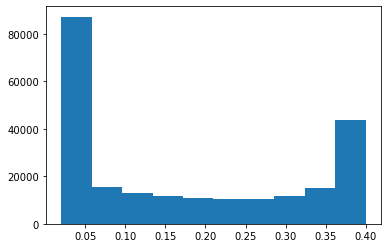

In [20]:
plt.hist(weights)

(array([163217.,  15105.,   9920.,   8131.,   6935.,   6408.,   5228.,
          4636.,   4603.,   6037.]),
 array([0.02 , 0.058, 0.096, 0.134, 0.172, 0.21 , 0.248, 0.286, 0.324,
        0.362, 0.4  ]),
 <BarContainer object of 10 artists>)

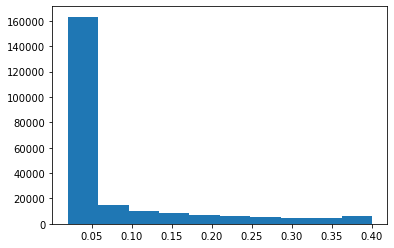

In [11]:
plt.hist(weights2)

(array([3.9256897e+07, 5.1050100e+05, 7.3807900e+05, 1.1851390e+06,
        1.4254360e+06, 1.5065640e+06, 1.1867830e+06, 5.4733300e+05,
        8.1162000e+04, 2.1060000e+03]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

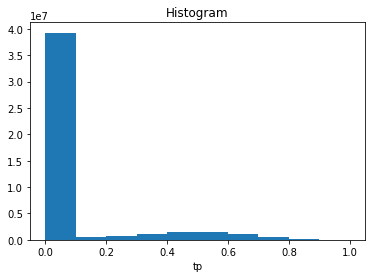

In [15]:
ds_train.mrms.plot()

(array([4.6242952e+07, 1.6890100e+05, 2.2276000e+04, 4.3350000e+03,
        1.0230000e+03, 3.5800000e+02, 1.0800000e+02, 3.2000000e+01,
        9.0000000e+00, 6.0000000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

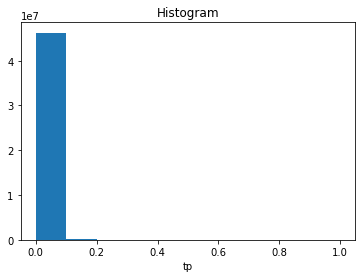

In [16]:
ds_train2.mrms.plot()

In [17]:
ds_train.maxs

<xarray.Dataset>
Dimensions:    ()
Coordinates:
    lead_time  timedelta64[ns] 12:00:00
Data variables:
    tp         float64 9.801

In [4]:
ds_train = TiggeMRMSDataset(
    tigge_dir=f'{DATADRIVE}/tigge/32km/',
    tigge_vars=['total_precipitation'],
    mrms_dir=f'{DATADRIVE}/mrms/4km/RadarOnly_QPE_06H/',
    rq_fn=f'{DATADRIVE}/mrms/4km/RadarQuality.nc',
    data_period=('2018-01', '2018-01'),
    first_days=2,
)

/opt/conda/envs/ilan/lib/python3.9/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


Loading data


In [6]:
%load_ext line_profiler

In [100]:
ds_train.idxs

array([[  0,   0,   0],
       [  0,   0,   1],
       [  0,   0,   2],
       ...,
       [  1,  72, 129],
       [  1,  73, 127],
       [  1,  73, 128]])

In [99]:
%lprun -f ds_train.compute_weights weights = ds_train.compute_weights()

Timer unit: 1e-06 s

Total time: 0.372273 s
File: /home/jupyter/repositories/nwp-downscale/notebooks/stephan_notebooks/src/dataloader.py
Function: compute_weights at line 309

Line #      Hits         Time  Per Hit   % Time  Line Contents
   309                                               def compute_weights(self, min_weight=0.02, max_weight=0.4, threshold=0.025, exp=4, 
   310                                                                   compute_on_X=False):
   311                                                   """
   312                                                   Compute sampling weights for each sample. WEight is simply the mean precip
   313                                                   value of the target, clipped.
   314                                                   This can then be used in torch.utils.data.WeightedRandomSampler, for example.
   315                                                   """
   316                                                

In [ ]:
np.copy()

In [65]:
ds_train.idxs

array([[  0,   0,   0],
       [  0,   0,   1],
       [  0,   0,   2],
       ...,
       [  1,  72, 129],
       [  1,  73, 127],
       [  1,  73, 128]])

In [12]:
ds_train.idxs.shape

(16062, 3)

In [14]:
ii = ds_train.idxs[:2]
ii

array([[0, 0, 0],
       [0, 0, 1]])

In [16]:
ii.T

array([[0, 0],
       [0, 0],
       [0, 1]])

In [15]:
v = ds_train.tigge.values[0]
v.shape

(2, 93, 172)

In [25]:
v[tuple(ds_train.idxs.T)].shape

(16062,)

In [23]:
v[(0, 0, 0)]

0.0

In [44]:
min_weight=0.02; max_weight=0.4; threshold=0.025; exp=4

In [83]:
n = (ds_train.mrms > threshold)[:, ::-1, ::-1].rolling(lat=ds_train.patch_mrms).mean().rolling(lon=ds_train.patch_mrms).mean()[:, ::-1, ::-1]

In [85]:
ds_train._setup_indices()

In [86]:
mrms_idxs = np.copy(ds_train.idxs)
mrms_idxs[:, 1:] *= ds_train.ratio
ds_train._setup_indices()

In [87]:
mrms_idxs

array([[   0,    0,    0],
       [   0,    0,    8],
       [   0,    0,   16],
       ...,
       [   1,  576, 1032],
       [   1,  584, 1016],
       [   1,  584, 1024]])

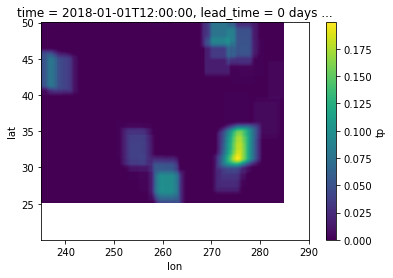

In [84]:
n[0].plot()

In [88]:
coverage2 = n.values[tuple(mrms_idxs.T)]

In [89]:
coverage2.shape

(16062,)

In [90]:
scale = max_weight - min_weight
x = 1-(np.array(coverage2)-1)**exp
weights2 = min_weight + x * scale

In [91]:
weights.shape, weights2.shape

((16062,), (16062,))

In [92]:
coverage[:5]

[0.0020751953125,
 0.00213623046875,
 0.00213623046875,
 0.002197265625,
 0.002197265625]

In [93]:
coverage2[:5]

array([0.0020752 , 0.00213623, 0.00213623, 0.00219727, 0.00219727])

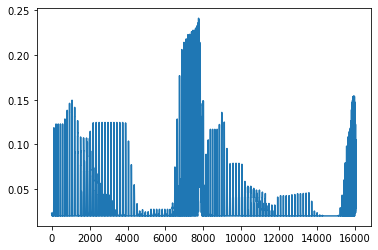

In [94]:
plt.plot(weights)

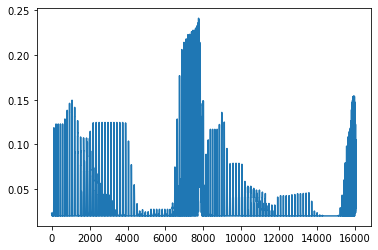

In [95]:
plt.plot(weights2)

In [19]:
[v[i] for i in ii]

[array([[[0.        , 0.        , 0.        , ..., 0.00575177,
          0.00602542, 0.00454001],
         [0.        , 0.        , 0.        , ..., 0.00521553,
          0.00580283, 0.00588021],
         [0.        , 0.        , 0.        , ..., 0.00422407,
          0.00379205, 0.00534962],
         ...,
         [0.12370884, 0.0942021 , 0.14278407, ..., 0.03816902,
          0.05037405, 0.05857157],
         [0.05568547, 0.06541271, 0.08928451, ..., 0.06071736,
          0.06609373, 0.06251139],
         [0.05080627, 0.0919947 , 0.13047614, ..., 0.03991073,
          0.05063766, 0.04881964]],
 
        [[0.        , 0.        , 0.        , ..., 0.00575177,
          0.00602542, 0.00454001],
         [0.        , 0.        , 0.        , ..., 0.00521553,
          0.00580283, 0.00588021],
         [0.        , 0.        , 0.        , ..., 0.00422407,
          0.00379205, 0.00534962],
         ...,
         [0.12370884, 0.0942021 , 0.14278407, ..., 0.03816902,
          0.05037405, 0.

In [13]:
ds_train.tigge.values[0][ds_train.idxs]

IndexError: index 2 is out of bounds for axis 0 with size 2

In [6]:
ds_train.tigge

<xarray.DataArray (variable: 1, valid_time: 2, lat: 93, lon: 172)>
array([[[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          5.75176783e-03, 6.02541585e-03, 4.54001206e-03],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          5.21552999e-03, 5.80283351e-03, 5.88021435e-03],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          4.22407115e-03, 3.79205141e-03, 5.34962413e-03],
         ...,
         [1.23708839e-01, 9.42020968e-02, 1.42784075e-01, ...,
          3.81690156e-02, 5.03740476e-02, 5.85715711e-02],
         [5.56854660e-02, 6.54127088e-02, 8.92845110e-02, ...,
          6.07173604e-02, 6.60937315e-02, 6.25113926e-02],
         [5.08062697e-02, 9.19946954e-02, 1.30476141e-01, ...,
          3.99107299e-02, 5.06376586e-02, 4.88196430e-02]],

        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          1.41842976e-03, 1.59079101e-03, 1.28074120e-03],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          1.32840654e-03, 1.00574581e-03, 5.94674163e-04],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          9.37480228e-04, 4.60555673e-04, 1.60243240e-04],
         ...,
         [3.29294488e-01, 2.96528311e-01, 1.94015768e-01, ...,
          5.43578153e-02, 3.45028453e-02, 1.79433400e-02],
         [6.64794451e-01, 7.97124844e-01, 5.19736523e-01, ...,
          4.15049353e-02, 2.51548800e-02, 1.29005675e-02],
         [1.86942863e-01, 3.31373858e-01, 5.00641281e-01, ...,
          2.15031655e-02, 2.27308622e-02, 3.66940067e-02]]]])
Coordinates:
    lead_time   timedelta64[ns] 12:00:00
    init_time   (valid_time) datetime64[ns] 2018-01-01 2018-01-02
  * lon         (lon) float64 235.2 235.5 235.8 236.2 ... 289.3 289.6 289.9
  * lat         (lat) float64 49.68 49.36 49.04 48.72 ... 21.2 20.88 20.56 20.24
  * valid_time  (valid_time) datetime64[ns] 2018-01-01T12:00:00 2018-01-02T12...
  * variable    (variable) <U2 'tp'

In [7]:
ds_train.mrms

<xarray.DataArray 'tp' (time: 2, lat: 750, lon: 1376)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])
Coordinates:
  * time       (time) datetime64[ns] 2018-01-01T12:00:00 2018-01-02T12:00:00
  * lat        (lat) float64 50.0 49.96 49.92 49.88 ... 20.16 20.12 20.08 20.04
  * lon        (lon) float64 235.0 235.0 235.1 235.1 ... 289.9 289.9 290.0 290.0
    lead_time  timedelta64[ns] 12:00:00

In [8]:
ds_train.rqmask

<xarray.DataArray (lat: 5, lon: 10)>
array([[ True,  True,  True,  True,  True,  True,  True, False, False,
        False],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
        False],
       [False, False, False, False, False,  True, False, False,  True,
        False]])
Coordinates:
    time     datetime64[ns] ...
  * lat      (lat) float64 47.44 42.32 37.2 32.08 26.96
  * lon      (lon) float64 237.6 242.7 247.8 252.9 ... 268.3 273.4 278.5 283.6

In [9]:
ds_train.idxs.shape

(72, 3)

In [11]:
ds_train.patch_tigge, ds_train.patch_mrms

(16, 128)

In [37]:
93/16, 172/16

(5.8125, 10.75)

In [38]:
750/128, 1376/128

(5.859375, 10.75)

In [12]:
rq = xr.open_dataarray(f'{DATADRIVE}/mrms/4km/RadarQuality.nc')
# Account for padding
rq = rq.isel(lat=slice(ds_train.pad_mrms, -ds_train.pad_mrms or None), 
             lon=slice(ds_train.pad_mrms, -ds_train.pad_mrms or None))

In [17]:
rq.load()

<xarray.DataArray (lat: 750, lon: 1376)>
array([[ 0.38984373,  0.38984373,  0.38984373, ...,  0.64335936,
         0.64335936,  0.64335936],
       [ 0.38984373,  0.38984373,  0.38984373, ...,  0.64335936,
         0.64335936,  0.64335936],
       [ 0.38984373,  0.38984373,  0.38984373, ...,  0.64335936,
         0.64335936,  0.64335936],
       ...,
       [-3.        , -3.        , -3.        , ..., -3.        ,
        -3.        , -3.        ],
       [-3.        , -3.        , -3.        , ..., -3.        ,
        -3.        , -3.        ],
       [-3.        , -3.        , -3.        , ..., -3.        ,
        -3.        , -3.        ]], dtype=float32)
Coordinates:
    time     datetime64[ns] 2020-05-16
  * lat      (lat) float64 49.84 49.84 49.84 49.84 ... 20.08 20.08 20.08 20.08
  * lon      (lon) float64 235.2 235.2 235.2 235.2 ... 289.9 289.9 289.9 289.9

In [32]:
rq.rolling({'lat': ds_train.patch_mrms}, center=True, min_periods=1).min()

<xarray.DataArray (lat: 750, lon: 1376)>
array([[ 0.38984373,  0.38984373,  0.38984373, ...,  0.6386719 ,
         0.6386719 ,  0.6386719 ],
       [ 0.38984373,  0.38984373,  0.38984373, ...,  0.6386719 ,
         0.6386719 ,  0.6386719 ],
       [ 0.38984373,  0.38984373,  0.38984373, ...,  0.6386719 ,
         0.6386719 ,  0.6386719 ],
       ...,
       [-3.        , -3.        , -3.        , ..., -3.        ,
        -3.        , -3.        ],
       [-3.        , -3.        , -3.        , ..., -3.        ,
        -3.        , -3.        ],
       [-3.        , -3.        , -3.        , ..., -3.        ,
        -3.        , -3.        ]], dtype=float32)
Coordinates:
    time     datetime64[ns] 2020-05-16
  * lat      (lat) float64 49.84 49.84 49.84 49.84 ... 20.08 20.08 20.08 20.08
  * lon      (lon) float64 235.2 235.2 235.2 235.2 ... 289.9 289.9 289.9 289.9

In [33]:
new = rq.rolling({'lat': ds_train.patch_mrms}, center=True, min_periods=1).min().rolling(
    {'lon': ds_train.patch_mrms}, center=True, min_periods=1).min() >=0

In [48]:
new2 = rq.rolling({'lat': ds_train.patch_mrms}, center=False, min_periods=1).min().rolling(
    {'lon': ds_train.patch_mrms}, center=False, min_periods=1).min() >=0

In [73]:
new3 = (rq[::-1, ::-1].rolling({'lat': ds_train.patch_mrms}, center=False, min_periods=1).min().rolling(
    {'lon': ds_train.patch_mrms}, center=False, min_periods=1).min() >=0)[::-1, ::-1]

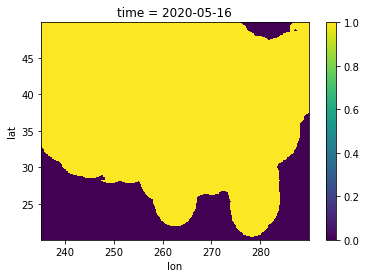

In [23]:
(rq >= 0).plot()

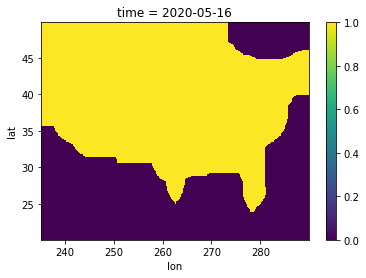

In [34]:
new.plot()

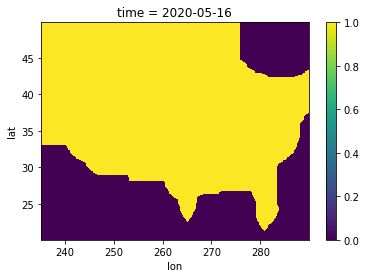

In [49]:
new2.plot()

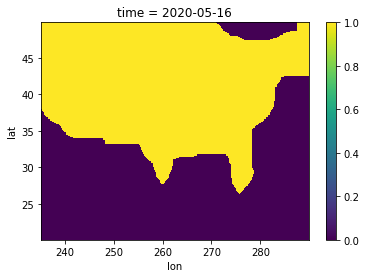

In [74]:
new3.plot()

In [30]:
new

<xarray.DataArray (lat: 750, lon: 1376)>
array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])
Coordinates:
    time     datetime64[ns] 2020-05-16
  * lat      (lat) float64 49.84 49.84 49.84 49.84 ... 20.08 20.08 20.08 20.08
  * lon      (lon) float64 235.2 235.2 235.2 235.2 ... 289.9 289.9 289.9 289.9

In [84]:
ds_train.pad_tigge=5

In [79]:
ds_train._create_rqmask(f'{DATADRIVE}/mrms/4km/RadarQuality.nc')

In [85]:
ds_train._setup_indices()

In [86]:
idxs = ds_train.idxs

In [83]:
len(idxs)

16062

In [87]:
len(idxs)

14376

In [89]:
idxs[:3]

array([[0, 5, 5],
       [0, 5, 6],
       [0, 5, 7]])

In [97]:
ds_train.pad_tigge_channel = False

In [102]:
X, y = ds_train[1]

In [103]:
X.shape, y.shape

((1, 26, 26), (1, 128, 128))

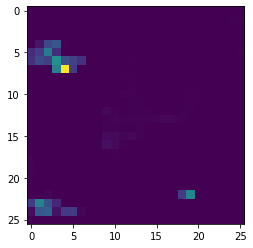

In [104]:
plt.imshow(X[0])

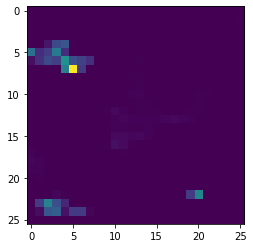

In [101]:
plt.imshow(X[0])

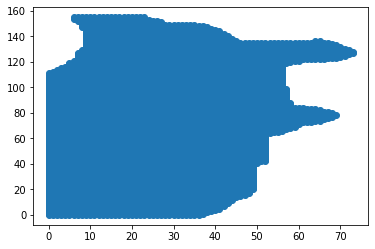

In [78]:
plt.scatter(*np.unique(idxs[:, 1:], axis=0).T)

In [105]:
np.mgrid[2:10:5, 2:10:5]

array([[[2, 2],
        [7, 7]],

       [[2, 7],
        [2, 7]]])